# Plotting Zoo - with style!

Since matplotlib allows you to use style sheets to change your plots with a single line of code and those changes can entirely remake your plots. Let's apply a style to the plots we just made to see just how dramatic that change can be:

In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/employment-by-industry.csv")
employment = data.values[:, 1:].astype(float) / 1000
sectors = ["Healthcare", "State Gov.", "Retail", "Manufacturing", "Food & Hotel"]
years = [2018, 2019, 2020, 2021, 2022]

# APPLY THE STYLE
plt.style.use("mystyle.mplstyle")

## Line plot

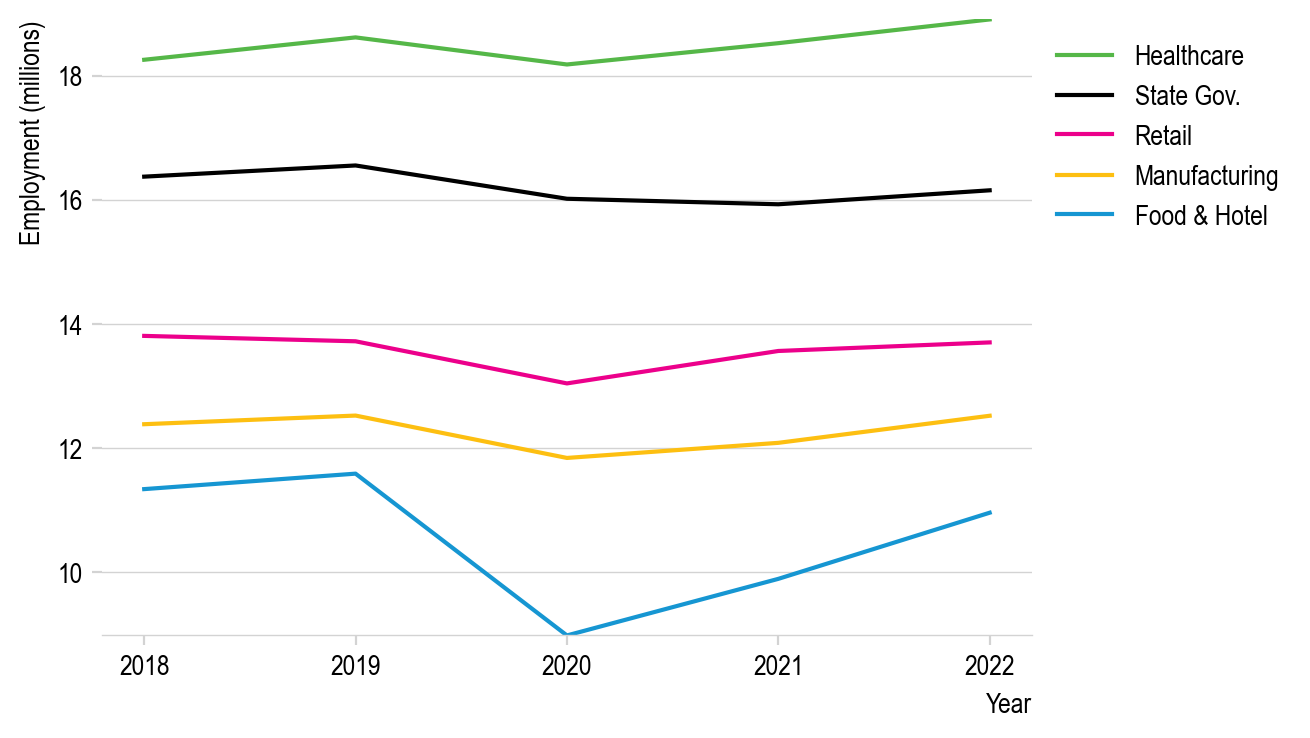

In [2]:
fig, ax = plt.subplots(figsize=(6, 4))

for sector, employees in zip(sectors, employment):
    ax.plot(years, employees, label=sector)
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xticks(years)

## Line plot small multiples

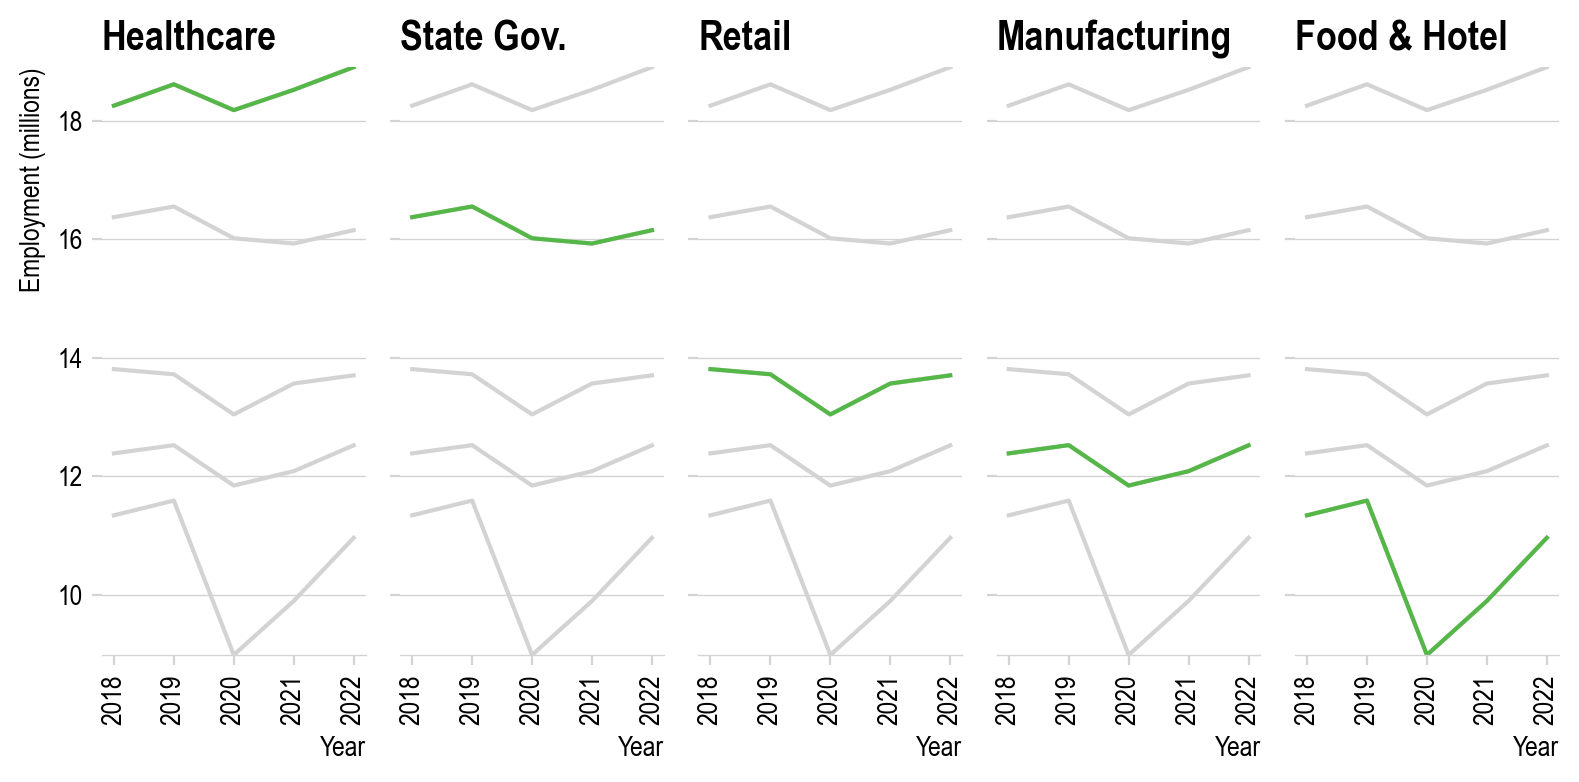

In [3]:
N_sectors = len(sectors)
fig, axs = plt.subplots(
    1, N_sectors, sharey=True, figsize=(8, 4)
)  # Sharey means only the leftmost y-tick labels are shown

# Plot all the plots in grey
for ax in axs.flatten():
    for sector, employees in zip(sectors, employment):
        ax.plot(years, employees, color="lightgrey")
    ax.set_xlabel("Year")
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=90)

# Plot one plot each in color and title the plot with that sector
for sector, employees, ax in zip(sectors, employment, axs.flatten()):
    ax.plot(years, employees)
    ax.set_title(sector)

# Only place one ylabel on the first set of Axes:
axs[0].set_ylabel("Employment (millions)")

plt.tight_layout()

## Bar plot

Text(0, 1, 'Employment (millions)')

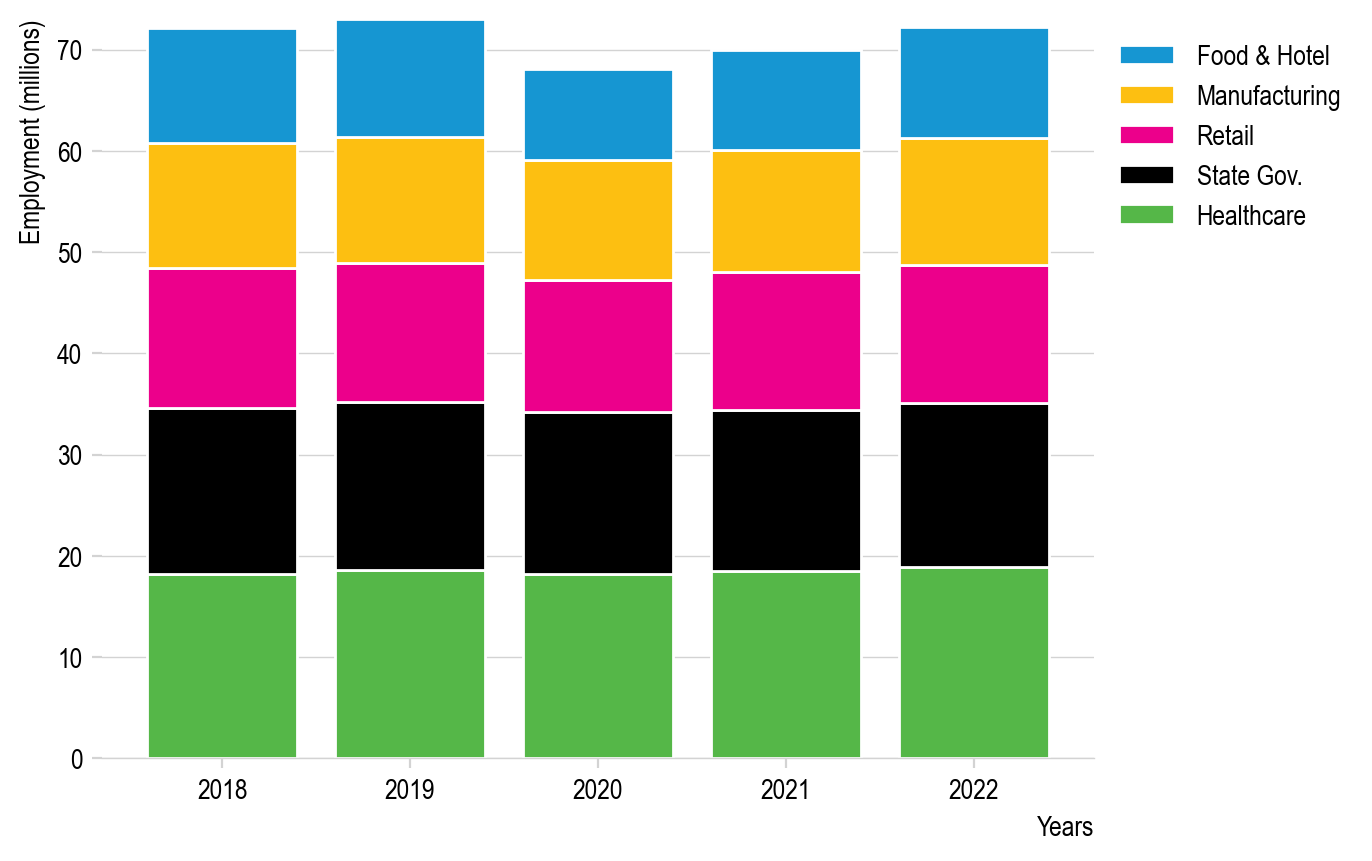

In [4]:
fig, ax = plt.subplots()

N_years = len(years)
bottom = np.zeros(
    N_years
)  # Stores the current baseline of the bars to set as the baseline for the next set of bars

for sector, employees in zip(sectors, employment):
    ax.bar(
        years, employees, label=sector, bottom=bottom, edgecolor="white"
    )  # edgecolor = 'white' places a bit of white between the bars for clarity (a personal preference)
    bottom += employees

ax.legend(
    bbox_to_anchor=(1, 1), loc="upper left", reverse=True
)  # This ensures the order matches the order in the plot from top to bottom
ax.set_xlabel("Years")
ax.set_ylabel("Employment (millions)")

Text(0, 1, 'Employment (millions)')

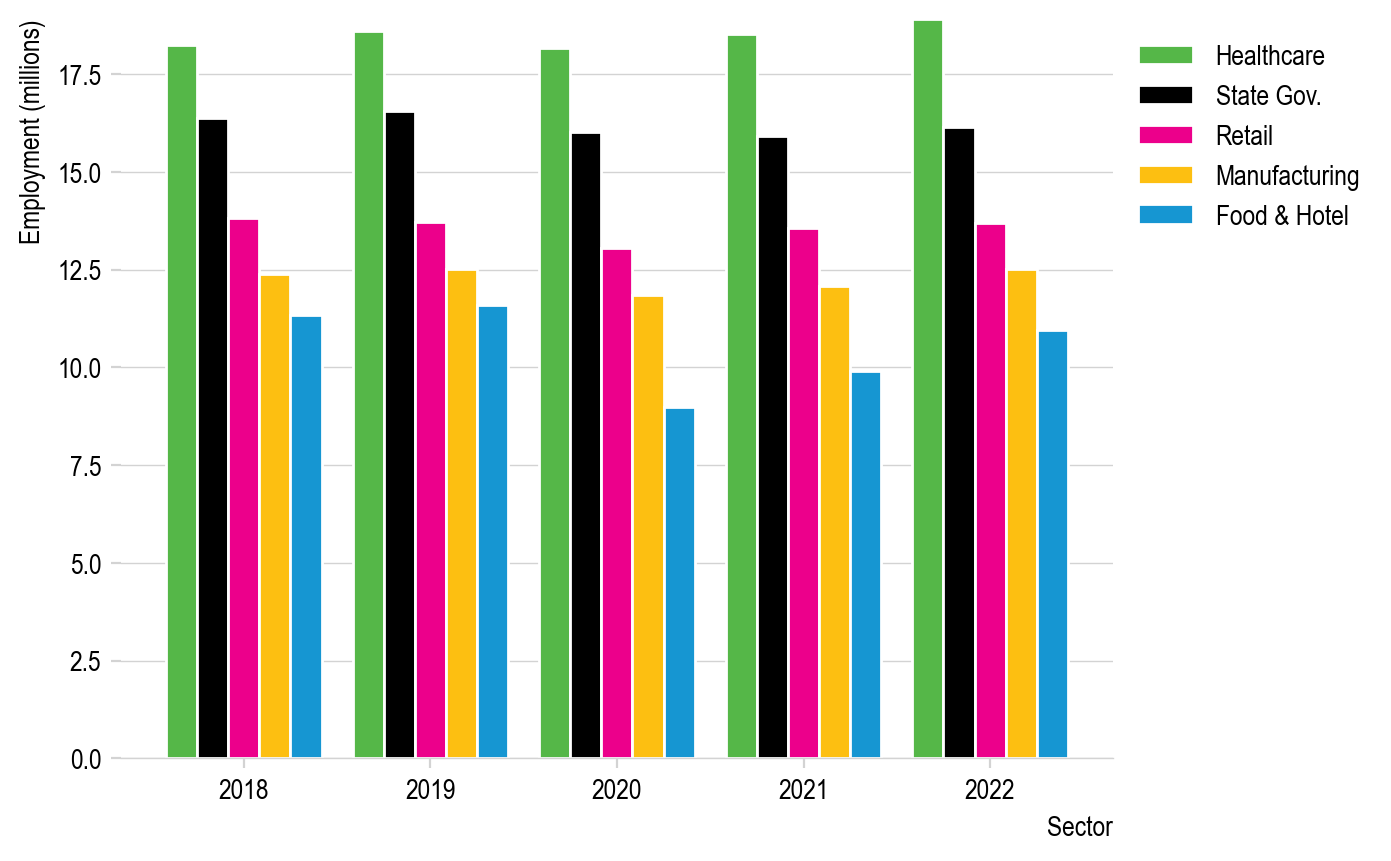

In [5]:
fig, ax = plt.subplots()

num_columns = len(sectors)  # Number of bars per group
num_rows = len(years)  # Number of groups

x_values = np.arange(num_rows)

bar_width = 1 / (
    num_columns + 1
)  # width of the bars. To ensure a gap between groups, this could be 1 / (N+1) where N is the number of bars per group
column_count = 0  # Count of how many sets of bars have been plotted so far

for sector, employees in zip(sectors, employment):
    offset = (
        bar_width * column_count
    )  # Offset from the x axis value for the group to the place where the bar will be centered
    ax.bar(
        x_values + offset, employees, width=bar_width, label=sector, edgecolor="white"
    )  # edgecolor = 'white' places a bit of white between the bars for clarity (a personal preference)
    column_count += 1

tick_locations = (
    x_values + (1 - offset) / 2 + bar_width
)  # Place the ticks at the center of the groups of bars
ax.set_xticks(tick_locations)
ax.set_xticklabels(years)

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel("Sector")
ax.set_ylabel("Employment (millions)")

## Stackplots

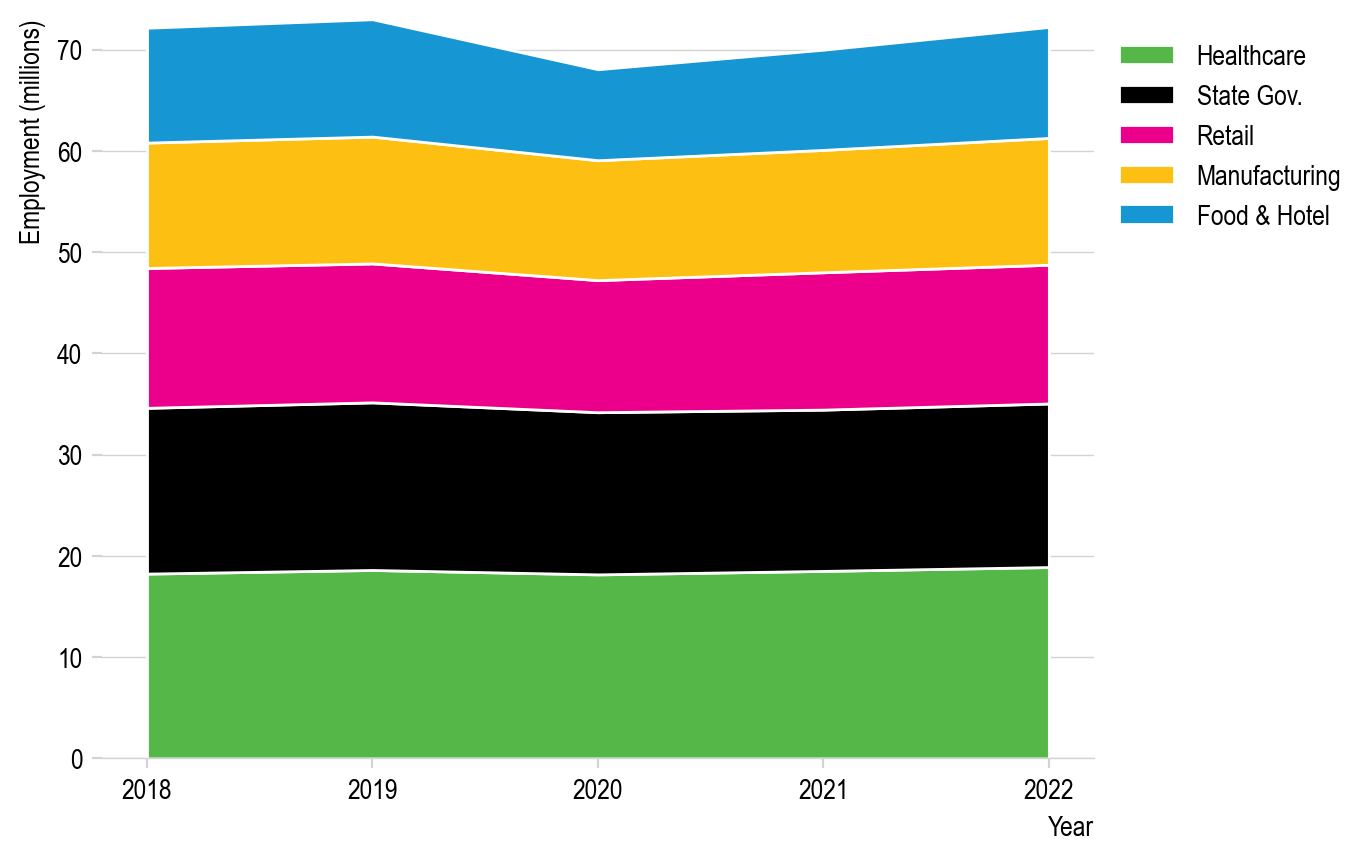

In [6]:
fig, ax = plt.subplots()

ax.stackplot(
    years, employment, labels=sectors, edgecolor="white"
)  # edgecolor = 'white' places a bit of white between the colors for clarity (a personal preference)
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.set_xticks(years)

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

### Scaled stack plots

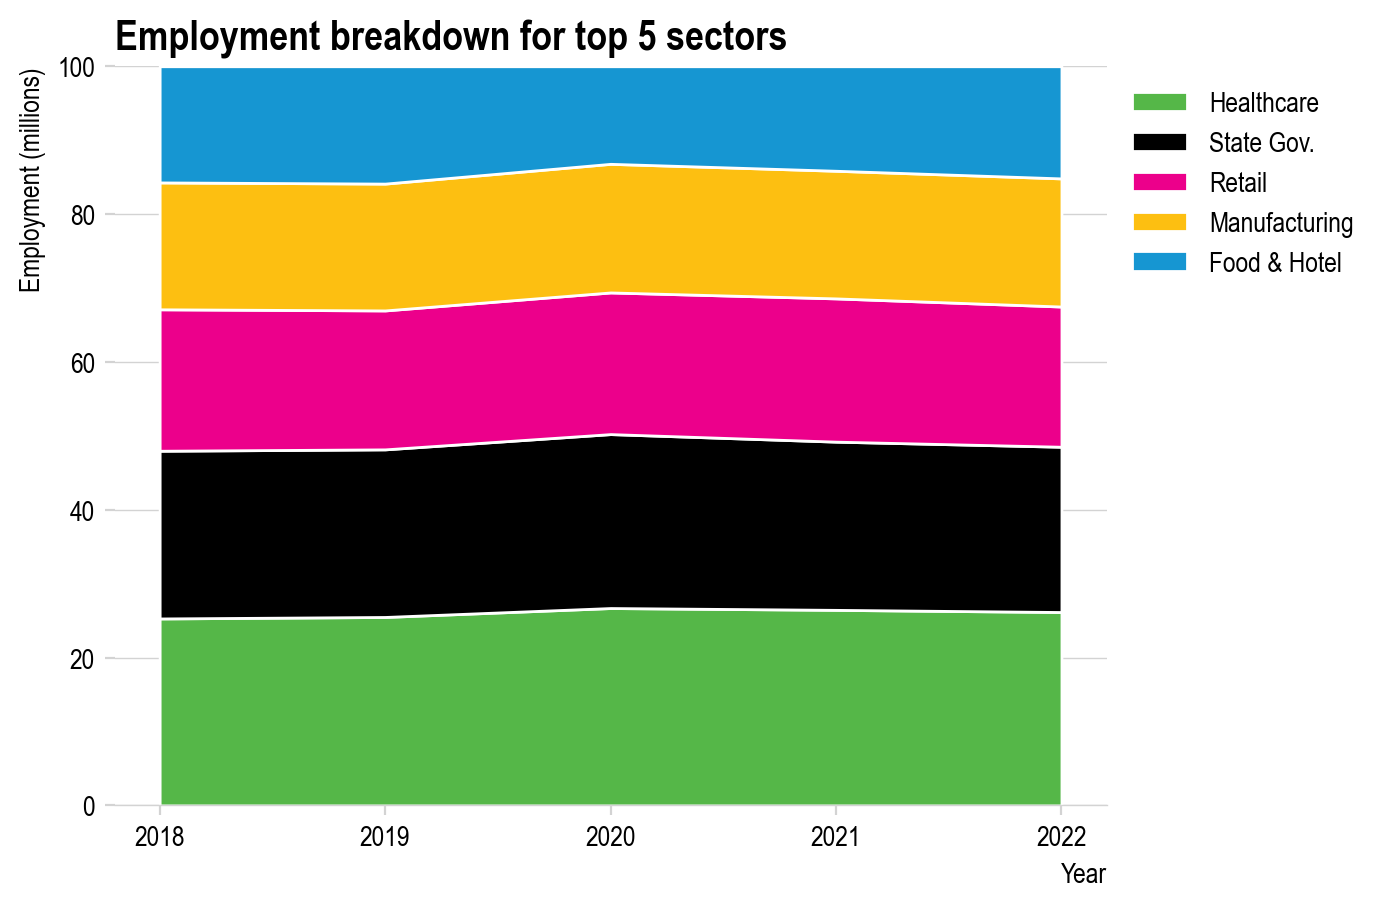

In [7]:
# Convert our data to a percentage
employment_percent = employment / employment.sum(axis=0) * 100

fig, ax = plt.subplots()

ax.stackplot(years, employment_percent, labels=sectors, edgecolor="white")
ax.set_xlabel("Year")
ax.set_ylabel("Employment (millions)")
ax.set_xticks(years)
ax.set_title("Employment breakdown for top 5 sectors")

ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

## Pie charts

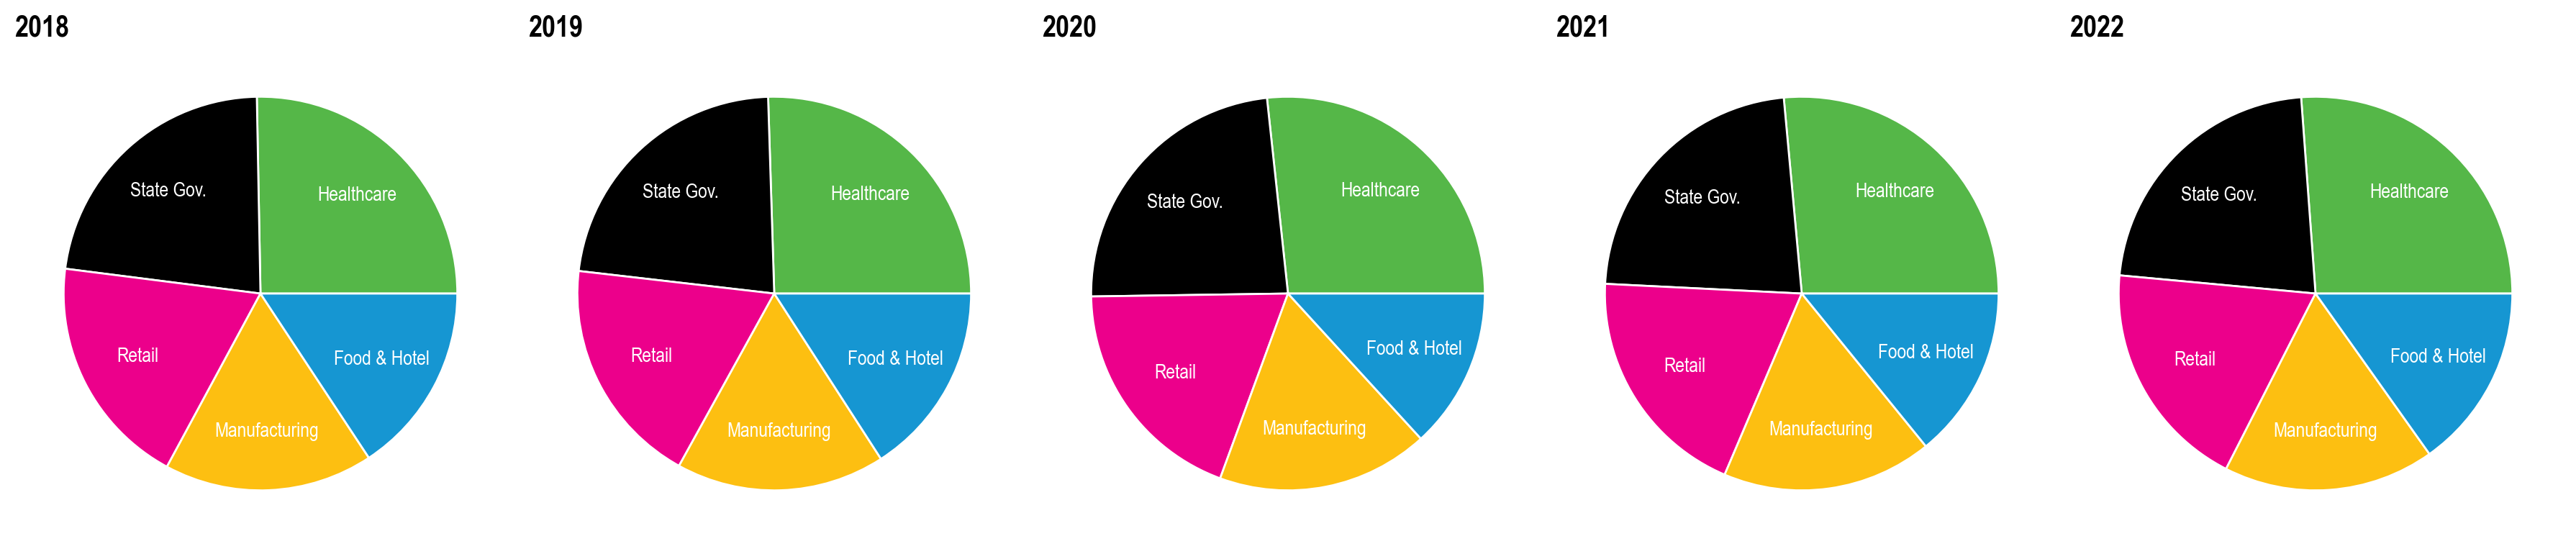

In [8]:
N_sectors = len(sectors)
fig, axs = plt.subplots(
    1, N_sectors, figsize=(18, 5)
)  # The figsize here is set sufficiently

# Plot all the plots in grey
employment_by_sector = employment.T
for year, employees, ax in zip(years, employment_by_sector, axs.flatten()):
    ax.pie(
        employees,
        labels=sectors,
        labeldistance=0.7,
        wedgeprops={"edgecolor": "white"},
        textprops={"horizontalalignment": "center", "color": "white"},
    )
    ax.set_title(year)

plt.tight_layout()

## Your turn

Try change the styles yourself and see which you prefer. Try existing styles, download a new one, or create your own!